# 损失函数

#### 1. 均方误差

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]    #2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    #2
mean_squared_error(np.array(y), np.array(t))    #正确，误差较小

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]    #7
mean_squared_error(np.array(y), np.array(t))    #错误，误差较大

0.5975

#### 2. 交叉熵误差

In [5]:
def cross_entropy_error01(y, t):
    delta = 1e-7    #添加一个微小值以防止负无限大的发生
    return -np.sum(t * np.log(y+delta))

In [6]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]    
cross_entropy_error01(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]    
cross_entropy_error01(np.array(y), np.array(t))

2.302584092994546

#### 3. mini-batch学习

In [8]:
#读入MNIST数据集
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

In [9]:
#随即抽取10笔数据
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000, 10)

array([  145, 52972, 57369, 35895, 11064, 56569, 48651, 54176, 10214,
       33068])

#### 4. mini-batch版交叉熵误差

In [11]:
#可同时处理单个数据和批量数据(标签为one-hot表示)
def cross_entropy_error02(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
        
    batch_size = y.shape[0]
    return - np.sum(t * np.log(y + 1e-7)) / batch_size   

In [12]:
# 如何验证

In [13]:
#标签为非one-hot表示
def cross_entropy_error03(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
        
    batch_size = y.shape[0]
    return - np.sum(np.log(y[np.range(batch_size), t] + 1e-7)) / batch_size    #****

# 数值微分

#### 1.数值微分

In [14]:
#函数：y = 0.01x**2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [15]:
#求导
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [16]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [17]:
import matplotlib.pylab as plt

0.1999999999990898


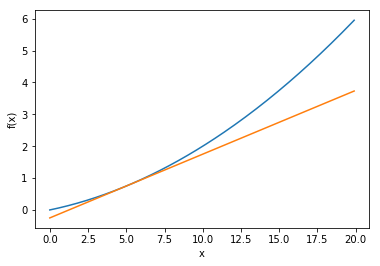

In [18]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [19]:
numerical_diff(function_1, 5)

0.1999999999990898

In [20]:
numerical_diff(function_1, 10)

0.2999999999986347

#### 2.梯度

In [21]:
#function_2: y = x0**2 + x1**2
def function_2(x):
    return x[0]**2 + x[1]**2

In [22]:
#?
def function_3(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [23]:
#梯度的实现
def numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)           #生成与x形状相同的数组         
    for idx in range(x.size):
        tmp_val = x[idx] 
        
        #f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
                         
        #f(x-h)
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
                         
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val    #还原值
                         
    return grad

In [24]:
numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [25]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)
        
        return grad

In [26]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [27]:
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

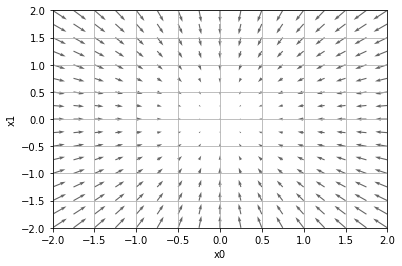

In [28]:
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

#### 3.梯度法

In [29]:
#Python实现梯度下降算法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f, x)
        x -= lr*grad
        
    return x, np.array(x_history)

In [30]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [31]:
init_x = np.array([-3.0, 4.0])

In [32]:
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

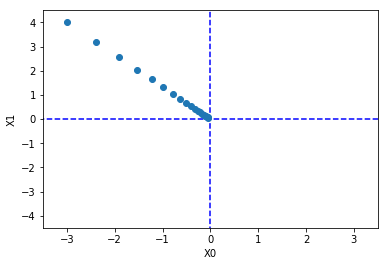

In [33]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [34]:
#简单神经网络求梯度
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [35]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [36]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

In [37]:
print(net.W)

[[ 1.0143133   0.0140133  -2.24885587]
 [-1.29594056  0.39911212 -0.5498061 ]]


In [38]:
p = net.predict(x)
print(p)

[-0.55775852  0.36760889 -1.84413902]


In [39]:
np.argmax(p)    #最大值的索引

1

In [40]:
net.loss(x, t)

2.62113381909916

In [41]:
#写法一
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.15793342  0.39843365 -0.55636708]
 [ 0.23690014  0.59765048 -0.83455061]]


In [42]:
#写法二:推荐
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.15793342  0.39843365 -0.55636708]
 [ 0.23690014  0.59765048 -0.83455061]]


# 学习算法的实现

#### 1.两层神经网络的实现

In [43]:
from common.functions import *

In [44]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [45]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [46]:
net.params['W1'].shape

(784, 100)

In [47]:
net.params['b1'].shape

(100,)

In [48]:
net.params['W2'].shape

(100, 10)

In [49]:
net.params['b2'].shape

(10,)

In [50]:
#前向处理
x = np.random.rand(100, 784)    #伪输入数据（100笔）
y = net.predict(x)
print(y)

[[0.10562281 0.09659765 0.10478001 0.0965607  0.10272707 0.09572514
  0.09810101 0.09945621 0.10260376 0.09782564]
 [0.10562502 0.09637937 0.10489041 0.09650149 0.10265071 0.0959788
  0.09783629 0.09974324 0.10253365 0.09786101]
 [0.10563856 0.09611897 0.10493491 0.09627536 0.10256337 0.09586586
  0.09816335 0.09974283 0.10310296 0.09759383]
 [0.10547379 0.09642972 0.10471104 0.09627554 0.10259838 0.09613849
  0.09788322 0.0995806  0.10285497 0.09805425]
 [0.10571653 0.09663774 0.10444016 0.09668695 0.10245336 0.09595454
  0.09800746 0.09963347 0.10267107 0.09779872]
 [0.10547714 0.09675664 0.10457663 0.09619512 0.10318457 0.09601052
  0.09777505 0.09970967 0.10263936 0.0976753 ]
 [0.10568175 0.09651834 0.1044194  0.09664998 0.10269626 0.09568153
  0.09808915 0.09984875 0.10244239 0.09797246]
 [0.10571044 0.09670449 0.10444689 0.09606721 0.10278099 0.0960174
  0.09785676 0.09955457 0.1027788  0.09808245]
 [0.10542723 0.09655147 0.10445099 0.09657988 0.10316751 0.09556798
  0.09770199 0

In [51]:
#grads变量中保存了各个参数的梯度
t = np.random.rand(100, 10)    #伪正解标签（100笔）
print(t)

[[6.90064213e-01 2.12967013e-02 4.61167567e-01 9.30480901e-02
  7.32770944e-01 2.55507400e-01 4.41781804e-01 7.52560964e-01
  5.84672635e-01 5.17932381e-02]
 [1.30205361e-01 2.76121106e-01 6.21661585e-01 4.86155413e-02
  6.15904197e-01 3.75084709e-01 8.12251414e-01 7.70957774e-02
  8.52525582e-01 3.40784594e-01]
 [6.95926553e-01 7.35118387e-01 5.78845690e-04 5.53851346e-01
  7.87916724e-02 3.35291808e-01 3.43699053e-01 1.69019195e-02
  1.64365723e-01 5.06999601e-01]
 [1.28408140e-01 3.99361026e-01 4.83221933e-01 3.94062259e-01
  1.39769481e-02 6.84539310e-01 3.53665024e-01 4.26430189e-01
  9.69467858e-01 9.40326042e-01]
 [2.15488372e-01 5.78361703e-01 5.73575445e-01 1.19363819e-01
  4.16505087e-01 1.87295319e-01 1.60350538e-01 3.94117611e-01
  1.71745429e-02 5.50575460e-01]
 [2.34018202e-01 5.56091226e-02 5.24019361e-01 1.98245518e-01
  5.51500686e-01 8.92620019e-01 1.23649722e-01 1.32903145e-01
  8.84571312e-01 9.30345004e-01]
 [3.39457366e-01 8.56154095e-01 3.12515301e-01 7.37883652e

In [52]:
# grads = net.numerical_gradient(x, t)    #计算梯度
grads = net.gradient(x_batch, t_batch)    #高速版

In [53]:
grads['W1'].shape

(784, 100)

In [54]:
grads['b1'].shape

(100,)

In [55]:
grads['W2'].shape

(100, 10)

In [56]:
grads['b2'].shape

(10,)

#### mini-batch的实现

In [57]:
# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [58]:
#超参数
iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [59]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [60]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [61]:
iter_per_epoch = max(train_size / batch_size, 1)

In [62]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)    
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7787833333333334, 0.784
train acc, test acc | 0.8749333333333333, 0.8799
train acc, test acc | 0.89805, 0.9002
train acc, test acc | 0.90915, 0.9115
train acc, test acc | 0.9160166666666667, 0.9184
train acc, test acc | 0.9210333333333334, 0.9238
train acc, test acc | 0.9248666666666666, 0.9273
train acc, test acc | 0.92735, 0.9289
train acc, test acc | 0.93135, 0.9338
train acc, test acc | 0.9349, 0.9365
train acc, test acc | 0.9378, 0.9371
train acc, test acc | 0.9403, 0.9403
train acc, test acc | 0.9422166666666667, 0.9402
train acc, test acc | 0.9436, 0.9422
train acc, test acc | 0.9454166666666667, 0.9441
train acc, test acc | 0.94725, 0.945


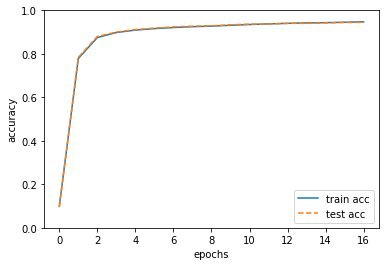

In [63]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()